In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [3]:
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])
testset = torchvision.datasets.MNIST(root='./mnist', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
dataiter = iter(testloader)

In [4]:
images, labels = dataiter.next()
input_data = images.numpy()

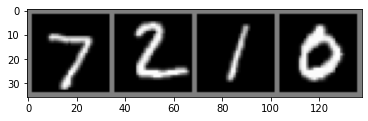

In [5]:
imshow(torchvision.utils.make_grid(images))

In [6]:
import joey as ml
import numpy as np
from joey.activation import ReLU

def forward_pass(input_data):
    parameters = get_parameters()
    
    batch_size = 4
    
    # Six 3x3 filters, activation RELU
    layer1 = ml.Conv(kernel_size=(6, 3, 3),
                     input_size=(batch_size, 1, 32, 32),
                     activation=ReLU())
    # 2x2 max pooling
    layer2 = ml.MaxPooling(kernel_size=(2, 2),
                           input_size=(batch_size, 6, 30, 30),
                           stride=(2, 2))
    # Sixteen 3x3 filters, activation RELU
    layer3 = ml.Conv(kernel_size=(16, 3, 3),
                     input_size=(batch_size, 6, 15, 15),
                     activation=ReLU())
    # 2x2 max pooling
    layer4 = ml.MaxPooling(kernel_size=(2, 2),
                           input_size=(batch_size, 16, 13, 13),
                           stride=(2, 2),
                           strict_stride_check=False)
    # Full connection (16 * 6 * 6 -> 120), activation RELU
    layer5 = ml.FullyConnected(weight_size=(120, 576),
                               input_size=(576, batch_size),
                               activation=ReLU())
    # Full connection (120 -> 84), activation RELU
    layer6 = ml.FullyConnected(weight_size=(84, 120),
                               input_size=(120, batch_size),
                               activation=ReLU())
    # Full connection (84 -> 10), output layer
    layer7 = ml.FullyConnected(weight_size=(10, 84),
                               input_size=(84, batch_size))
    # Flattening layer necessary between layer 4 and 5
    layer_flat = ml.Flat(input_size=(batch_size, 16, 6, 6))
    
    current_data = input_data
    current_data = layer1.execute(current_data, parameters[1], parameters[0])
    current_data = layer2.execute(current_data)
    current_data = layer3.execute(current_data, parameters[3], parameters[2])
    current_data = layer4.execute(current_data)
    
    current_data = layer_flat.execute(current_data)
    
    current_data = layer5.execute(current_data, parameters[5], parameters[4])
    current_data = layer6.execute(current_data, parameters[7], parameters[6])
    current_data = layer7.execute(current_data, parameters[9], parameters[8])
    
    return current_data

def get_parameters():
    # The LeNet trained parameters are stored in the following files:
    # 1.npy: layer 1 weights
    # 2.npy: layer 1 biases
    # 3.npy: layer 3 weights
    # 4.npy: layer 3 biases
    # 5.npy: layer 5 weights
    # 6.npy: layer 5 biases
    # 7.npy: layer 6 weights
    # 8.npy: layer 6 biases
    # 9.npy: layer 7 weights
    # 10.npy: layer 7 biases
    #
    # For layer numbering, see forward_pass().
    
    parameters = []
    path = './resources/'
    for i in range(10):
        to_add = np.load(path + str(i + 1) + '.npy')
        parameters.append(to_add)
    return parameters

In [7]:
results = forward_pass(input_data)

/home/maksymilian/Desktop/UROP/devito/devito/types/grid.py:206: RuntimeWarning: divide by zero encountered in true_divide
  spacing = (np.array(self.extent) / (np.array(self.shape) - 1)).astype(self.dtype)
Operator `Kernel` run in 0.01 s
Operator `Kernel` run in 0.01 s
Operator `Kernel` run in 0.01 s
Operator `Kernel` run in 0.01 s
Operator `Kernel` run in 0.01 s
Operator `Kernel` run in 0.01 s
Operator `Kernel` run in 0.01 s
Operator `Kernel` run in 0.01 s


In [8]:
print(results)

[[-1.25093235  2.40170754 -2.91894739 11.40261028]
 [-2.07392762  3.71119382 10.29915659 -3.86913358]
 [ 1.71857655 11.98346066  0.78475773 -0.83818808]
 [ 2.72902527  1.57888285 -2.29991193 -2.10936302]
 [-3.44730161 -0.97862156  0.74267698 -2.76126013]
 [-2.24625136 -6.90597038 -2.56770215  0.69071474]
 [-9.81793181 -1.31553492 -2.71544678  1.17052616]
 [11.80988846 -2.70283259  0.54783864  1.00494804]
 [-1.00474132 -2.48071229 -1.01346485 -1.28202689]
 [ 4.6835631  -6.38347289 -2.26087571 -0.76408295]]


In [9]:
expected = np.array([[-1.2509323 ,  2.4017086 , -2.9189475 , 11.402614  ],
                     [-2.0739274 ,  3.711194  , 10.299156  , -3.8691325 ],
                     [ 1.7185768 , 11.983461  ,  0.7847577 , -0.8381885 ],
                     [ 2.7290256 ,  1.5788821 , -2.2999125 , -2.1093633 ],
                     [-3.447302  , -0.9786217 ,  0.7426771 , -2.761261  ],
                     [-2.2462513 , -6.905971  , -2.5677016 ,  0.6907152 ],
                     [-9.817931  , -1.3155346 , -2.7154455 ,  1.1705266 ],
                     [11.809888  , -2.7028327 ,  0.54783845,  1.0049481 ],
                     [-1.0047406 , -2.4807127 , -1.013465  , -1.2820265 ],
                     [ 4.6835623 , -6.3834734 , -2.2608764 , -0.76408434]])
error = abs(results - expected) / expected

In [10]:
print(error)
print(np.amax(error))

[[-3.63663429e-08  4.40914511e-07 -3.72550049e-08  3.25849137e-07]
 [-1.05593081e-07  4.90411682e-08  5.72853023e-08 -2.79713692e-07]
 [ 1.45904743e-07  2.85106639e-08  4.09210438e-08 -5.01416183e-07]
 [ 1.20755307e-07  4.73338244e-07 -2.46663913e-07 -1.33781978e-07]
 [-1.13912282e-07 -1.40684427e-07  1.58951535e-07 -3.16022361e-07]
 [-2.53501737e-08 -8.97095633e-08 -2.15097806e-07  6.65195837e-07]
 [-8.21189975e-08 -2.44784091e-07 -4.71435314e-07  3.77461859e-07]
 [ 3.91327608e-08 -4.14888517e-08  3.43611389e-07  5.78272754e-08]
 [-7.21504199e-07 -1.64031238e-07 -1.47184007e-07 -3.07741901e-07]
 [ 1.71215680e-07 -8.06319813e-08 -3.03396411e-07 -1.81879287e-06]]
6.651958371252912e-07
